<div style="text-align:center;">
  <h1><span style="color:blue;">TITANIC</span></h1>
</div>
   
    Performed by: Jose Ignacio Perez España 
    13.08.2023

# Table of Contents

1. [Introduction](#Introduction)
    1. [Data Source and Description](#Data-Source-and-Description)
2. [Libraries](#Libraries)
3. [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)
4. [EDA (Exploratory Data Analysis)](#EDA-Exploratory-Data-Analysis)
    1. [First Step: Dataset Metadata](#First-Step-Dataset-Metadata)
    2. [Second Step: Handling Null and/or Atypical Values](#Second-Step-Handling-Null-and-or-Atypical-Values)
    3. [Third Step: Descriptive, Distribution Analysis of the Variables and Correlations](#Third-Step-Descriptive-Distribution-Analysis-of-the-Variables-and-Correlations)
    4. [Fourth Step: Graphical Representation](#Fourth-Step-Graphical-Representation)
5. [Models](#Models)
    1. [Libraries](#Libraries-Models)
    2. [Survived Prediction](#Survived-Prediction)
    3. [XGBBoost](#XGBBoost)
6. [Conclusions](#Conclusions)

## <span style="color:lightblue"> 1. Introduction </span>

### <span style="color:lightblue"> 1.1 Data Source and Description </span>

The Titanic dataset, also known as the Titanic: Machine Learning from Disaster dataset, is a widely used database in the data analysis and machine learning community. It was created and provided by Kaggle.

This dataset contains information about the passengers on board the Titanic, including details such as their passenger class, age, gender, fare paid, among others. It is commonly used as a practice exercise to develop and evaluate machine learning models that predict passenger survival based on these features.

## <span style="color:lightblue"> 2. Libraries </span> 

In [1]:
import csv

#Libraries for Mathematical and Statistical Functions
import numpy as np
import pandas as pd
import scipy.stats as stats

#Machine learning 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import mplcursors

KeyboardInterrupt: 

## <span style="color:lightblue"> 3. Data loading and Preprocessing </span> 

In [ ]:
titanic_data = pd.read_csv(r"C:\Users\Usuario\Desktop\Upgrade Hub\Modulo 1\proyectosModulo1\titanic.csv")


In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <span style="color:lightblue"> 4. EDA (Exploratory Data Analysis) </span> 
    First step: Dataset Metadata.
(Means, Basic dataset exploration) 

    Second step: Handling null and/or atypical values.
(Columns without info, means, nulls > 70% would be dropped but a model is constructed to enhance the imputation of missing values in the 'Cabin' feature)

    Third step: Descriptive, Distribution analysis of the variables  and Correlations.

    Fourth step: Graphical representation.
(Huge graphical analysis across 17 differents graphs).

### <span style="color:lightblue"> 4.1 First step: Dataset Metadata </span> 

In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.size

10692

In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_data.head()  #dataset content

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.index.name = None
titanic_data = titanic_data.iloc[:, 1:]  

In [ ]:
titanic_data.info() #data types contained in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### <span style="color:lightblue"> 4.2 Second step: Handling null and/or atypical values </span> 

In [ ]:
nulls = titanic_data.isnull().sum()  #amount of null data and position
nulls

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
total_nulls = nulls.sum()

print("The total nulls in the dataset are:",total_nulls, "nulls")
decimals = 4
percentage_total_nulls= total_nulls/titanic_data.size
percentage_formatted = f"{percentage_total_nulls:.{decimals}f}"
print("The percentage of nulls are:",percentage_formatted,"%")

The total nulls in the dataset are: 866 nulls
The percentage of nulls are: 0.0884 %


In [ ]:
titanic_data.isnull().sum()*100/len(titanic_data)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

<AxesSubplot: >

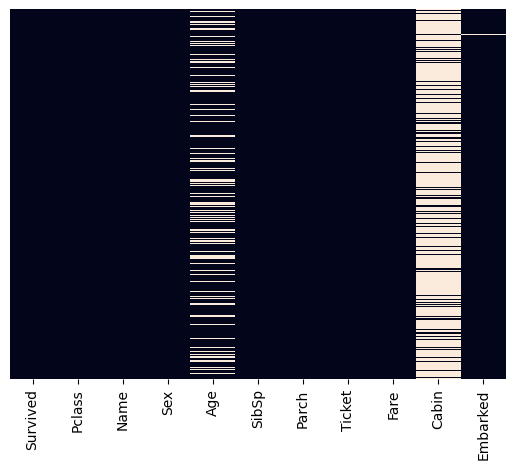

In [ ]:
sns.heatmap(data=titanic_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
titanic_data.dtypes  #Specific to analyze the data types

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
# We repaired the null values using the mean because it is a numerical variable
titanic_data["Age"] = pd.to_numeric(titanic_data["Age"], errors='coerce').fillna(titanic_data["Age"].mean())  

In [ ]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# We repaired the null values using the mode because it is a nominal variable (no numeric).
mode_Embarked = titanic_data["Embarked"].mode()

titanic_data["Embarked"] = titanic_data["Embarked"].fillna(mode_Embarked[0])

In [ ]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Criteria: The decision to remove a column with a high percentage of missing data depends on various factors, such as the context of the data and the purpose of the analysis.
#Factors like Relevance of the column, Imputation methods (estimating or inferring missing values based on existing data) and Correlation with other variables. 
#Because the variable is an object type (no numeric data) is not possible to apply Pearson correlation, then we can use ANOVA analysis.

In [ ]:
titanic_data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
#Because the variable is nominal is needed different method (analysis of anova) to analyze correlations:

model_age = ols('Age ~ Cabin', data=titanic_data).fit()
anova_table_age = sm.stats.anova_lm(model_age, typ=2)

print(anova_table_age)

                sum_sq     df        F    PR(>F)
Cabin     38355.865131  146.0  1.98955  0.001835
Residual   7526.603151   57.0      NaN       NaN


In summary, the results indicate that there is a statistically significant difference in variability among the groups defined by the "Cabin" variable. This implies that the "Cabin" variable is related to some other variable in the analysis, and that relationship is statistically significant.

In [ ]:
model_pclass = ols('Pclass ~ Cabin', data=titanic_data).fit()
anova_table_pclass = sm.stats.anova_lm(model_pclass, typ=2)

print(anova_table_pclass)

                sum_sq     df             F  PR(>F)
Cabin     5.615686e+01  146.0  6.524300e+27     0.0
Residual  3.360400e-27   57.0           NaN     NaN


In summary, the results indicate an extremely significant difference in variability among the groups defined by the "Cabin" variable. This suggests a strong relationship between the "Cabin" variable and another variable in the analysis, which is highly statistically significant.

In [ ]:
model_fare = ols('Fare ~ Cabin', data=titanic_data).fit()
anova_table_fare = sm.stats.anova_lm(model_fare, typ=2)

print(anova_table_fare)

                 sum_sq     df        F    PR(>F)
Cabin     994648.517087  146.0  3.01538  0.000003
Residual  128780.348410   57.0      NaN       NaN


In summary, the results indicate a highly significant difference in variability among the groups defined by the "Cabin" variable. This suggests a strong relationship between the "Cabin" variable and another variable in the analysis, which is highly statistically significant.

In [ ]:
model_survived = ols('Survived ~ Cabin', data=titanic_data).fit()
anova_table_survived = sm.stats.anova_lm(model_survived, typ=2)

print(anova_table_survived)

             sum_sq     df         F    PR(>F)
Cabin     35.833333  146.0  1.472603  0.048133
Residual   9.500000   57.0       NaN       NaN


In summary, the results suggest a potential, but not highly significant, difference in variability among the groups defined by the "Cabin" variable. This implies a possible relationship between the "Cabin" variable and another variable in the analysis, which might have some statistical significance.

Pclass (Class): The variable "Pclass" has a very small p-value (PR(>F)) in the ANOVA analysis, indicating a highly significant relationship between "Pclass" and the target variable. Additionally, the F-value is extremely high, suggesting that "Pclass" has a strong influence on the variability of the target variable. This could make "Pclass" an important variable for a decision tree model.

Fare: Similar to "Pclass," the variable "Fare" has a very small p-value (PR(>F)) in the ANOVA analysis, implying a highly significant relationship between "Fare" and the target variable. The F-value is also considerably high. This indicates that "Fare" could be an important variable for the model.

Based on these results, the variables "Pclass" and "Fare" appear to have a stronger and more significant relationship with the target variable. Therefore, these two variables could be good candidates for inclusion in a decision tree model. However, remember that the final choice will also depend on the problem's context, domain knowledge, and possible experiments with different variable combinations.

In [ ]:
train_data = titanic_data[titanic_data["Cabin"].notnull()]
test_data = titanic_data[titanic_data["Cabin"].isnull()]

In [ ]:
predictors = ["Pclass", "Fare"]
X_train = train_data[predictors]
y_train = train_data["Cabin"]

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

X_test = test_data[predictors]

predicted_cabin = classifier.predict(X_test)

titanic_data.loc[titanic_data["Cabin"].isnull(), "Cabin"] = predicted_cabin

In [ ]:
titanic_data["Cabin"].isnull().sum()

0

In [ ]:
titanic_data.to_csv("titanic_data_repair.csv")

### <span style="color:lightblue"> 4.3 Third step: Descriptive, Distribution analysis of the variables and Correlations </span> 

#### <span style="color:lightblue"> Descriptives </span>

In [ ]:
clean_titanic_data = pd.read_csv("titanic_data_repair.csv")

In [ ]:
def describe_columns(dataframe):
    descriptions = []
    
    for column in dataframe.columns:
        description = dataframe[column].describe()
        descriptions.append(description)
    
    descriptions_df = pd.concat(descriptions, axis=1)
    print(descriptions_df)

describe_columns(clean_titanic_data)

        Unnamed: 0    Survived      Pclass                     Name   Sex  \
count   891.000000  891.000000  891.000000                      891   891   
mean    445.000000    0.383838    2.308642                      NaN   NaN   
std     257.353842    0.486592    0.836071                      NaN   NaN   
min       0.000000    0.000000    1.000000                      NaN   NaN   
25%     222.500000    0.000000    2.000000                      NaN   NaN   
50%     445.000000    0.000000    3.000000                      NaN   NaN   
75%     667.500000    1.000000    3.000000                      NaN   NaN   
max     890.000000    1.000000    3.000000                      NaN   NaN   
unique         NaN         NaN         NaN                      891     2   
top            NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq           NaN         NaN         NaN                        1   577   

               Age       SibSp       Parch  Ticket        Fare Cabin Embark

#### <span style="color:lightblue"> Visualization of Variables Distributions </span>

##### <span style="color:lightblue"> BoxPlot </span> 
Visualization distributions and Recognizing possible Outliers in the numeric variables.

In [ ]:
clean_titanic_data.dtypes

Unnamed: 0      int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age           float64
SibSp           int64
Parch           int64
Ticket         object
Fare          float64
Cabin          object
Embarked       object
dtype: object

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12084\1535903315.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, numeric_variables.index(var) + 1)


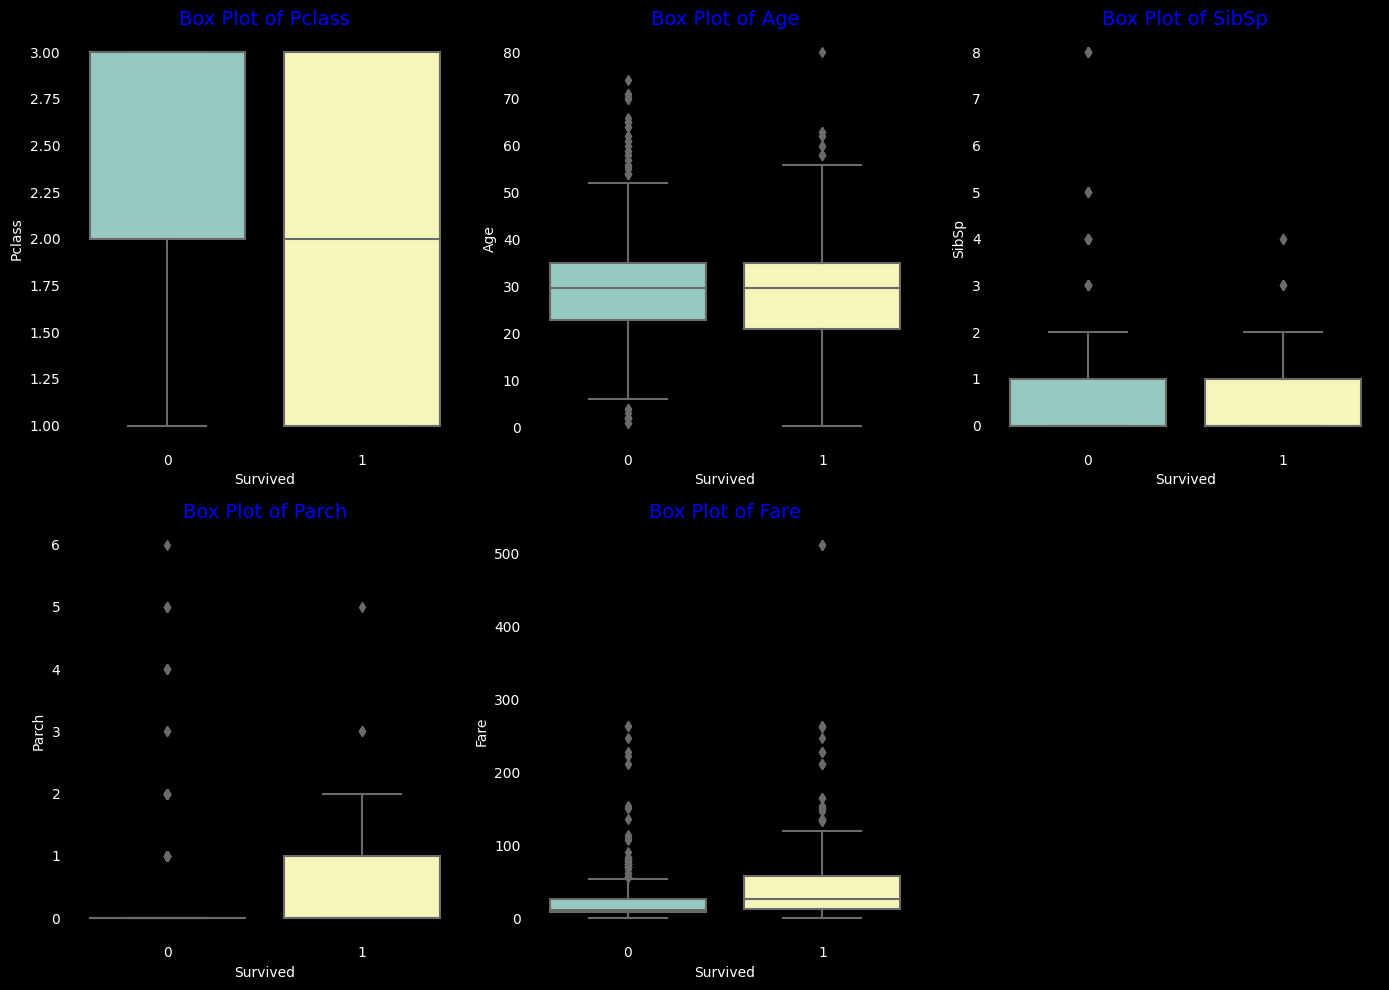

In [ ]:
def create_boxplots(dataframe, numeric_variables):
    plt.figure(figsize=(14, 10), facecolor='black')
    plt.title("Box Plots for Numeric Variables", color='white')

    for var in numeric_variables:
        plt.subplot(2, 3, numeric_variables.index(var) + 1)

        ax = sns.boxplot(x='Survived', y=var, data=dataframe, palette="Set3")
        ax.set_facecolor('black')

        plt.title(f'Box Plot of {var}', color='blue', fontsize=14)
        plt.xlabel('Survived', color='white')
        plt.ylabel(var, color='white')
        plt.xticks(color='white')
        plt.yticks(color='white')

    plt.tight_layout()
    plt.show()

numeric_variables = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

create_boxplots(clean_titanic_data, numeric_variables)

Outliers (points that fall outside the interquartile range) can be indicative of unusual data or measurement errors. They are represented as individual points beyond the whiskers.

##### <span style="color:lightblue"> Histograms </span> 
Visualization distributions and  Detecting features such as bias and kurtosis.

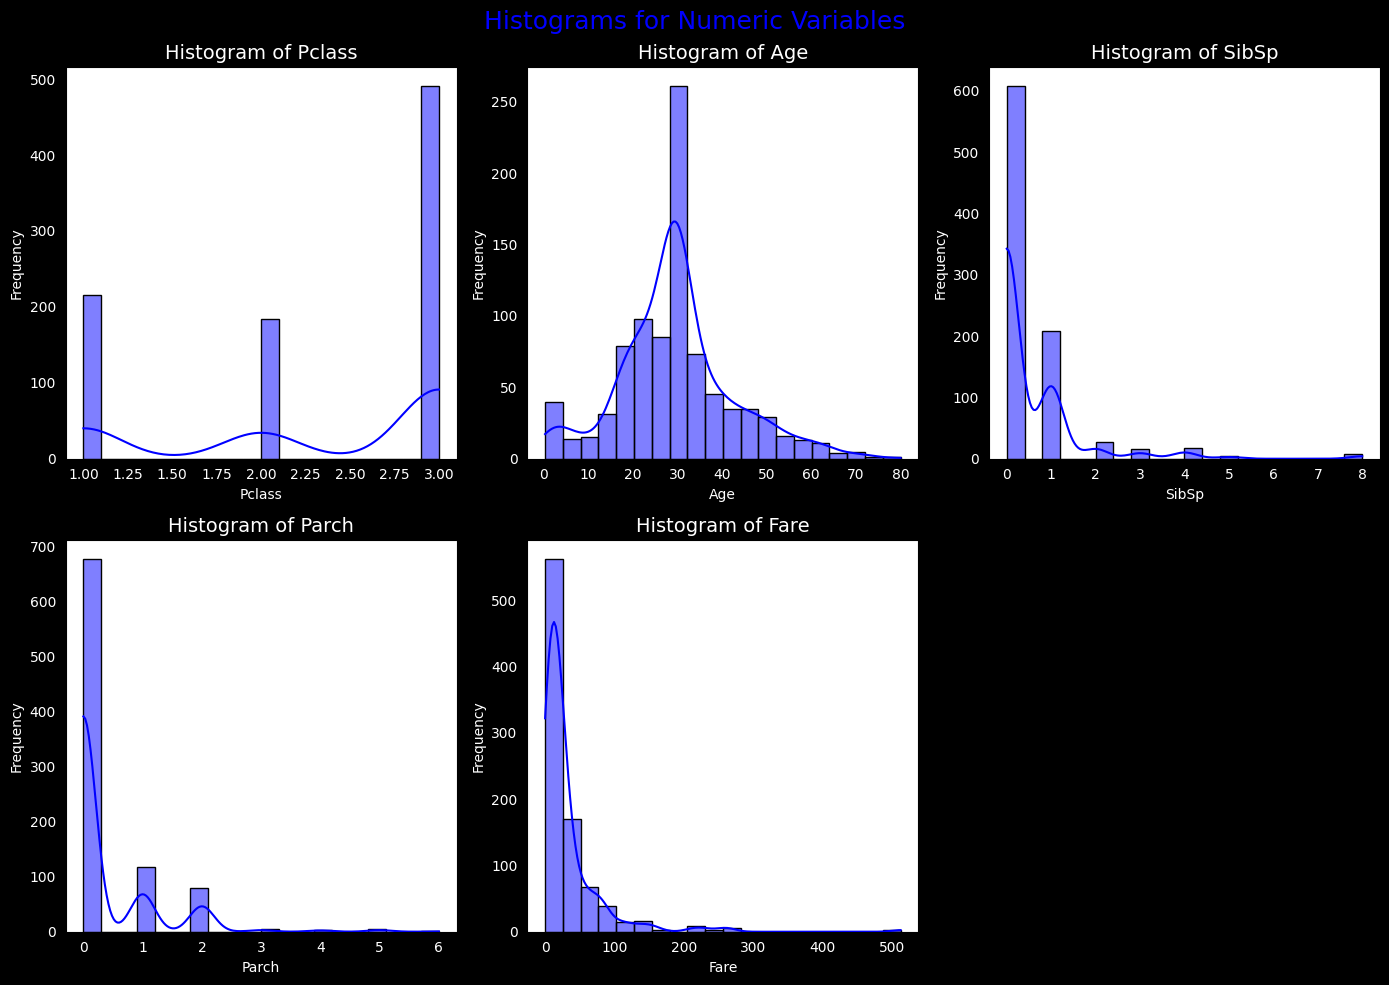

In [ ]:
def create_histograms(dataframe, numeric_variables):
    plt.figure(figsize=(14, 10), facecolor='black')
    plt.suptitle("Histograms for Numeric Variables", color='blue', fontsize=18)

    for i, var in enumerate(numeric_variables, 1):
        plt.subplot(2, 3, i)
        sns.histplot(data=dataframe, x=var, kde=True, color='blue', bins=20)
        plt.title(f'Histogram of {var}', color='white', fontsize=14)
        plt.xlabel(var, color='white')
        plt.ylabel('Frequency', color='white')
        plt.xticks(color='white')
        plt.yticks(color='white')

    plt.tight_layout()
    plt.show()

numeric_variables = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

create_histograms(clean_titanic_data, numeric_variables)

A histogram is considered unbiased if it is approximately symmetric around its central point (mean/median). A positive skewness indicates a longer tail on the right (positive bias), while a negative skewness indicates a longer tail on the left (negative bias).

In [ ]:
def calculate_kurtosis(data_frame, variables):
    kurtosis_values = {}
    
    for variable in variables:
        kurtosis_value = stats.kurtosis(data_frame[variable])
        kurtosis_values[variable] = kurtosis_value
    
    return kurtosis_values

variables_to_calculate = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
kurtosis_results = calculate_kurtosis(clean_titanic_data, variables_to_calculate)

for variable, kurtosis_value in kurtosis_results.items():
    print(f"Kurtosis for {variable}: {kurtosis_value}")

Kurtosis for Pclass: -1.2795696818700388
Kurtosis for Age: 0.9541389157820586
Kurtosis for SibSp: 17.77351174692092
Kurtosis for Parch: 9.716613236667277
Kurtosis for Fare: 33.20428925264474


High kurtosis values (positive or negative) indicate distributions with heavier tails (extreme values), whereas values close to 0 indicate distributions that are closer to a normal distribution.

##### <span style="color:lightblue"> Density Analysis </span>

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12084\3793086428.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_frame[variable], shade=True, color="blue", edgecolor='blue')


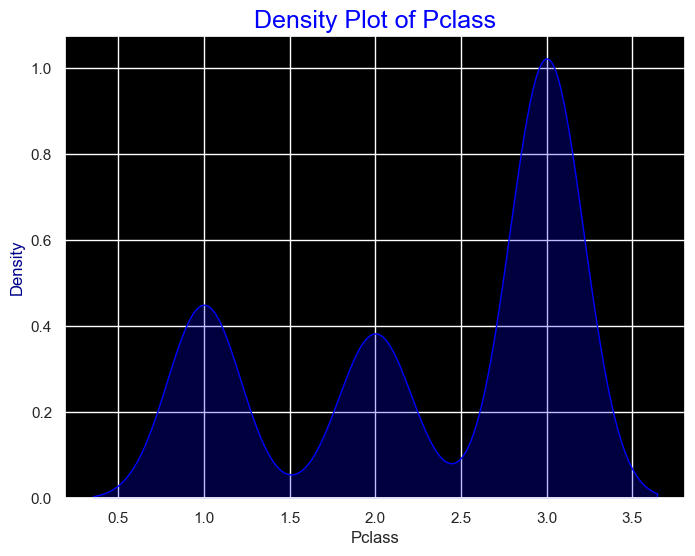

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12084\3793086428.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_frame[variable], shade=True, color="blue", edgecolor='blue')


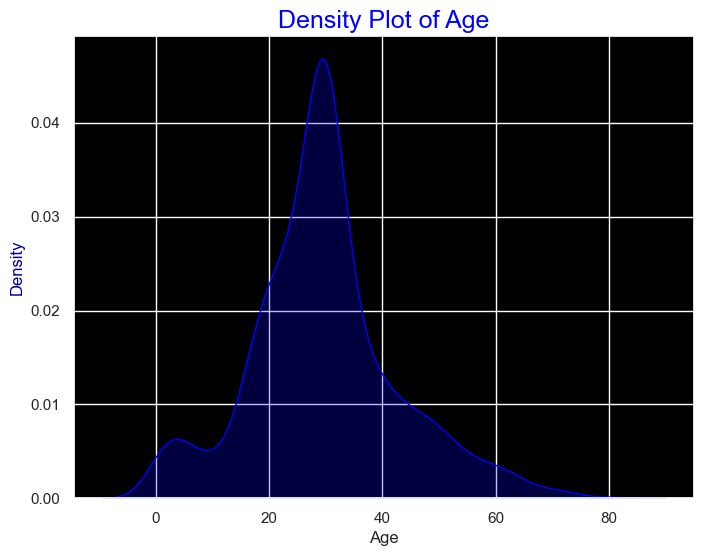

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12084\3793086428.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_frame[variable], shade=True, color="blue", edgecolor='blue')


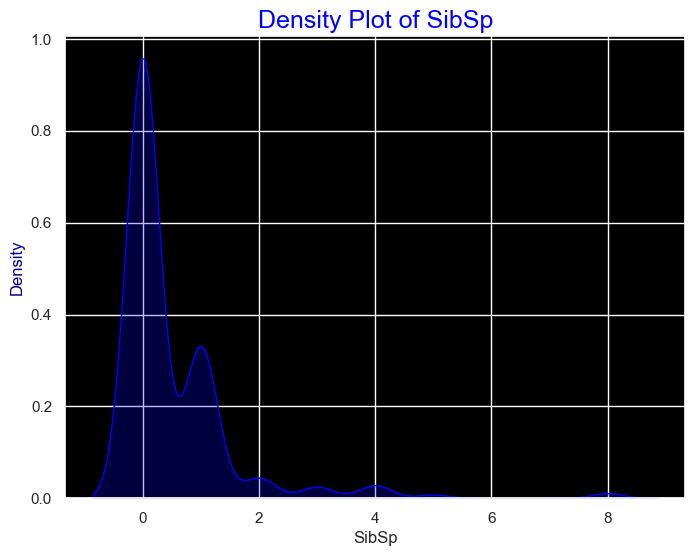

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12084\3793086428.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_frame[variable], shade=True, color="blue", edgecolor='blue')


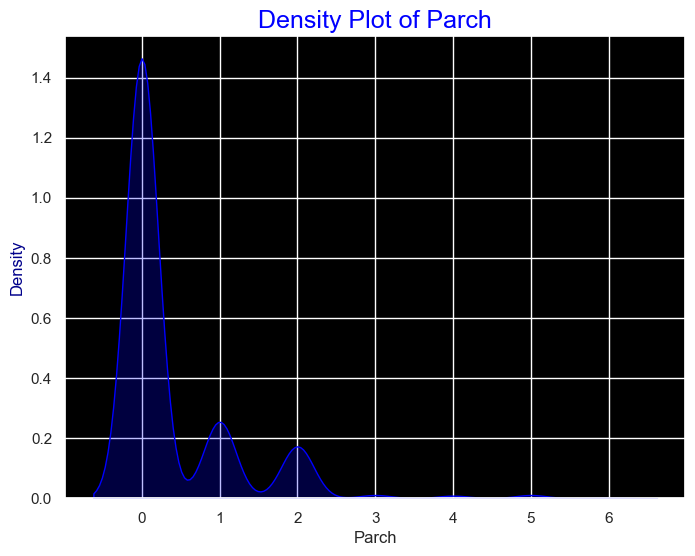

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12084\3793086428.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_frame[variable], shade=True, color="blue", edgecolor='blue')


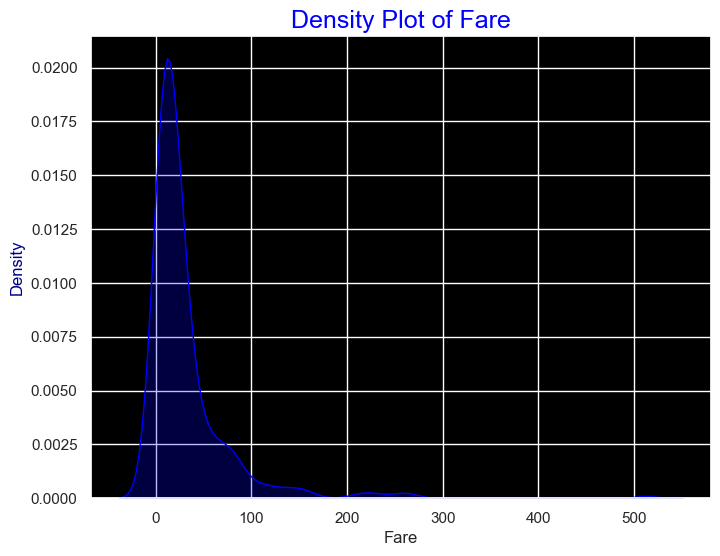

In [ ]:
def plot_density(data_frame, variables):
    sns.set(style="darkgrid")  
    plt.rcParams['axes.facecolor'] = 'black'

    for variable in variables:
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data_frame[variable], shade=True, color="blue", edgecolor='blue')
        plt.title(f'Density Plot of {variable}', color='blue', fontsize=18)
        plt.xlabel(variable)
        plt.ylabel('Density', color="darkblue")
        plt.show()

variables_to_plot = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
plot_density(clean_titanic_data, variables_to_plot)

##### <span style="color:lightblue"> Dispersion Analysis </span>

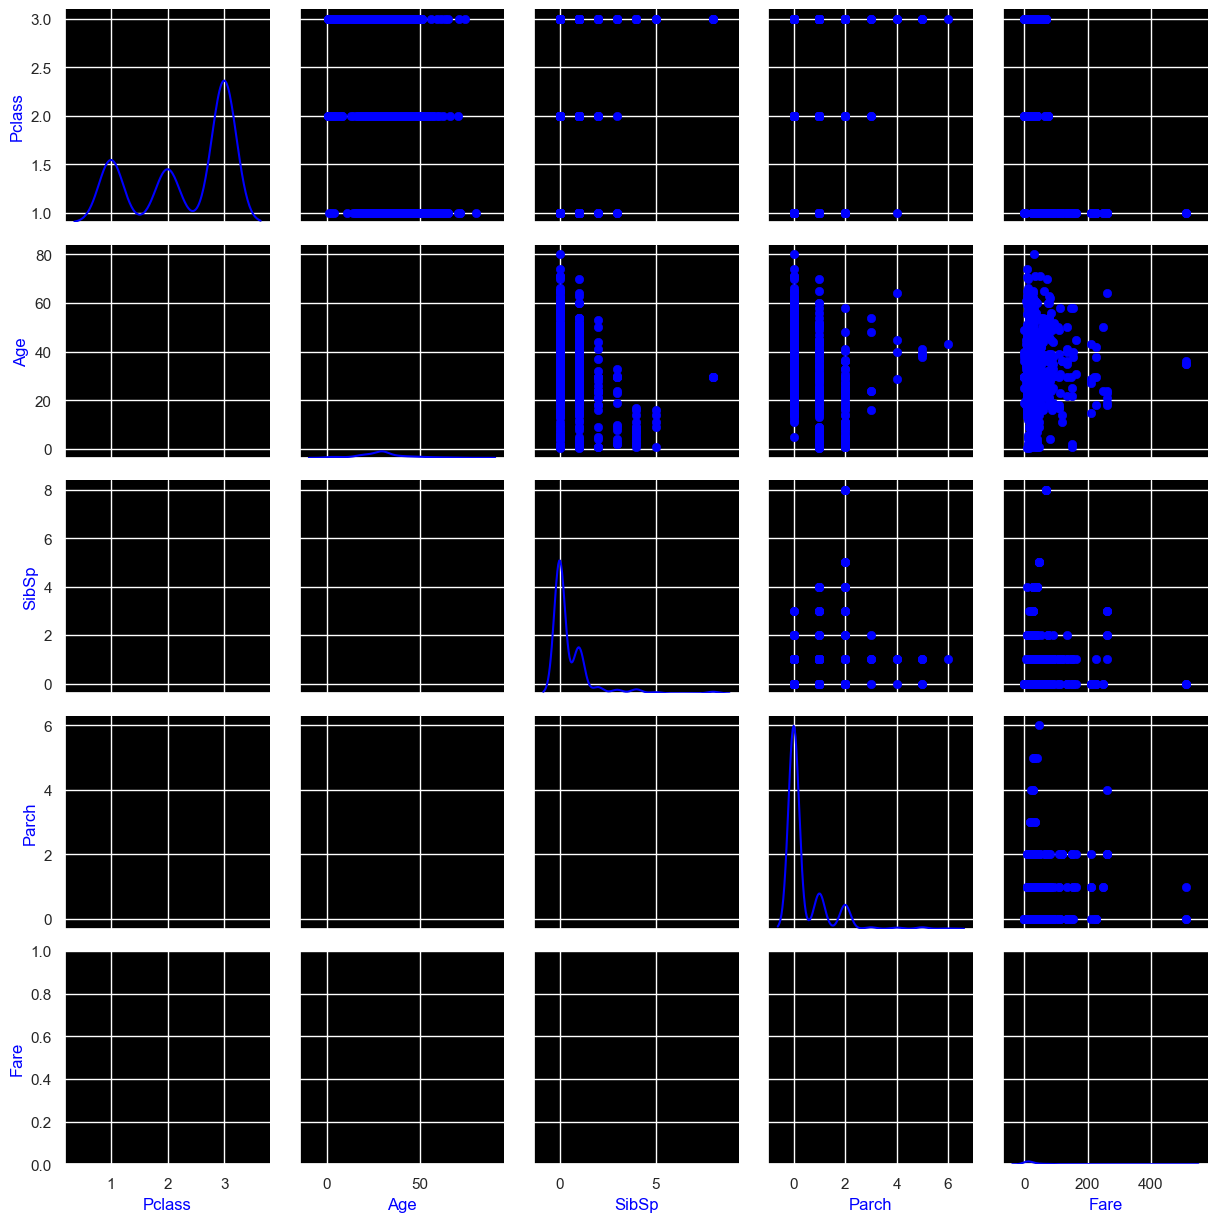

In [ ]:
def scatter_plot_matrix(data_frame, variables):
    sns.set(style="darkgrid")  
    
    sns.set_context("notebook", rc={"axes.facecolor": "black"})  
    
    g = sns.PairGrid(data_frame[variables])
    g.map_upper(sns.scatterplot, color='blue', edgecolor='blue')  
    g.map_diag(sns.kdeplot, color='blue')  
    
    # Changing color variables names:
    for ax in g.axes.flatten():
        ax.set_facecolor('black')
        ax.set_xlabel(ax.get_xlabel(), color='blue')
        ax.set_ylabel(ax.get_ylabel(), color='blue')
    
    plt.show()

variables_to_plot = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
scatter_plot_matrix(clean_titanic_data, variables_to_plot)

##### <span style="color:lightblue"> Distribution Analysis </span>

In [ ]:
Dist_age = px.histogram(clean_titanic_data, x = "Age", nbins=15,text_auto=True,
    title="Distribución de los pasajeros por edades",

    opacity=0.7,
    color_discrete_sequence=['grey'],
    template="plotly_dark"
)
Dist_age.update_layout(
    xaxis_title="Age Range",
    yaxis_title="people",
    xaxis_title_font_color="grey", 
    yaxis_title_font_color="grey",
    title_font_color="lightgrey",
    title_font_size=22,
    title_x=0.5 
)

Dist_age.show()

In [ ]:
dist_age_sex = px.histogram(clean_titanic_data, x = "Age", color= "Sex", nbins=15,text_auto=True,
    title="Distribution of passengers by age and gender",

    opacity=0.7,
    #color_discrete_sequence=['indianred'],
    template="plotly_dark"
)
dist_age_sex.update_layout(
    xaxis_title="Age",
    yaxis_title="People",
    xaxis_title_font_color="grey", 
    yaxis_title_font_color="grey",
    title_font_color="lightgrey",
    title_font_size=22,
    title_x=0.5 
)

dist_age_sex.show()

In [ ]:
Dist_price = px.scatter(clean_titanic_data, x = "Fare",
    title="Distribution based on ticket price",

    opacity=1,
    color_discrete_sequence=['grey'],
    template="plotly_dark"
)
Dist_price.update_layout(
    xaxis_title="Ticket price",
    yaxis_title="People",
    xaxis_title_font_color="grey", 
    yaxis_title_font_color="grey",
    title_font_color="lightgrey",
    title_font_size=22,
    title_x=0.5 
)

Dist_price.show()

##### <span style="color:lightblue"> Conclusions of the Distribution Analysis </span>

Based on the provided kurtosis values and the descriptive information about the variables, here are the possible distributions that could be appropriate for each variable:

Pclass: The kurtosis close to -1.28 suggests a distribution with lighter tails. Since "Pclass" is a categorical variable with discrete values, it might not have a specific parametric distribution like continuous distributions. However, we could treat it as a discrete distribution.

Age: With kurtosis close to 0.95, "Age" appears to have a shape similar to a normal distribution. However, keep in mind that the distribution of ages in real life rarely follows a perfectly normal distribution. A normal distribution could be an acceptable approximation.

SibSp and Parch: Both variables have high kurtosis, indicating heavy tails and the presence of outliers. Since both "SibSp" and "Parch" are discrete variables representing counts, they cannot be directly associated with common parametric distributions. A Poisson distribution could be an option to consider due to the count nature.

Fare: The very high kurtosis around 33.20 indicates extremely heavy tails in the fare distribution. Given the presence of outliers, a truncated exponential distribution or a gamma distribution might be more suitable for modeling the fare distribution.

In summary, in some cases, the discrete nature of variables and the presence of outliers make it challenging to assign specific parametric distributions. The choice of the appropriate distribution will depend on additional factors and the specific application of your analysis. You might need to explore more complex distributions if you wish to model these variables more accurately.







#### <span style="color:lightblue"> Correlations </span> 

In [ ]:
correlation_matrix = clean_titanic_data.corr()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12084\3022952725.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 1000x800 with 0 Axes>

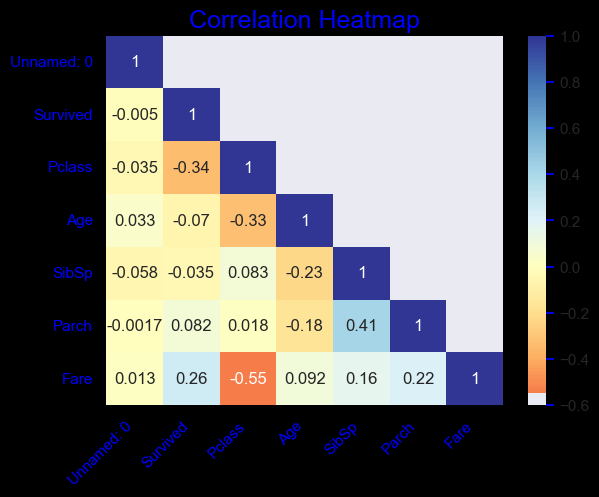

In [ ]:
plt.figure(figsize=(10, 8))
plt.figure(facecolor='black') 

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu', center=0)

plt.xticks(rotation=45, ha='right', color='blue')
plt.yticks(color='blue')



cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='blue')
cbar.set_ticks(cbar.get_ticks())
cbar.ax.yaxis.set_tick_params(color='blue')

plt.title("Correlation Heatmap", color="blue", fontsize= 18)
plt.show()

A correlation of -0.55 indicates a moderate negative correlation between the two variables in question. Negative correlation means that when one variable increases, the other tends to decrease, and vice versa.

In the context of the Titanic dataset, where "Pclass" represents the passenger class (1st, 2nd, or 3rd class) and "Fare" represents the paid fare, a moderate negative correlation could indicate that, on average, passengers of higher class (1st class) paid higher fares, while passengers of lower classes (3rd class) paid lower fares.

### <span style="color:lightblue"> 4.4 Fourth step: Graphical representation </span> 

In [ ]:
clean_titanic_data.columns

Index(['Unnamed: 0', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

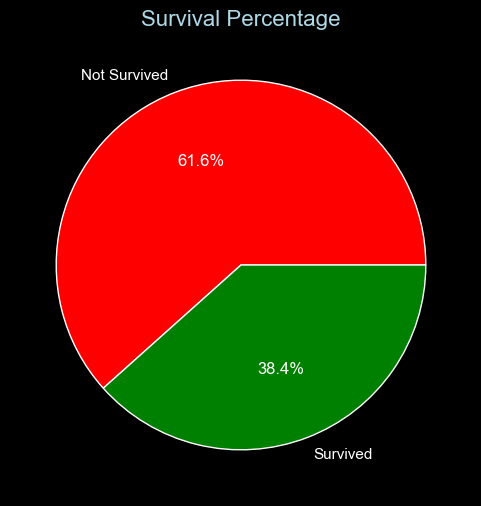

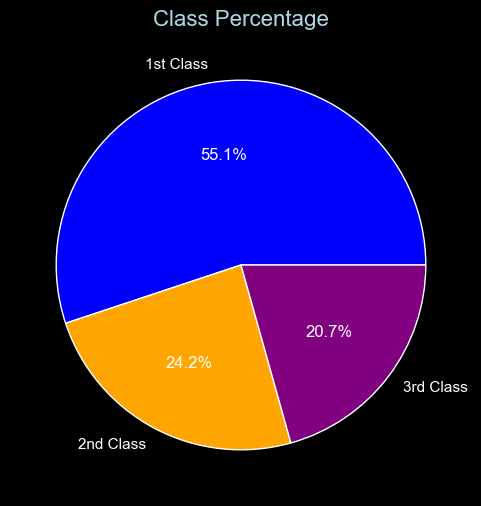

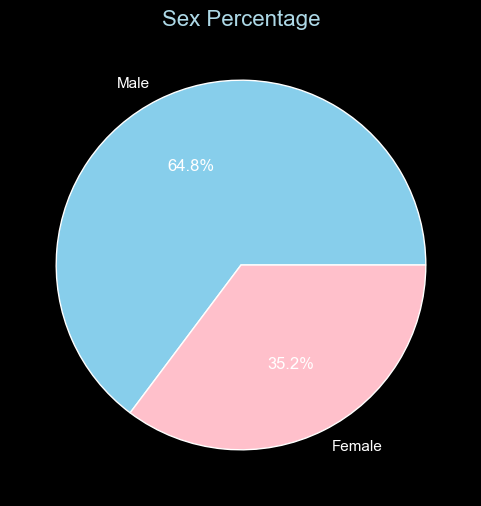

In [ ]:
plt.style.use('dark_background')


survival_counts = clean_titanic_data['Survived'].value_counts()
survival_labels = ['Not Survived', 'Survived']


# Creating the pie chart for survival
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=survival_labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Survival Percentage', color='lightblue', fontsize=16)
plt.rcParams['xtick.color'] = 'lightblue'
plt.rcParams['ytick.color'] = 'lightblue'
plt.show()

# Calculating the counts for Pclass
class_counts = clean_titanic_data['Pclass'].value_counts()
class_labels = ['1st Class', '2nd Class', '3rd Class']

# Creating the pie chart for Pclass
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', colors=['blue', 'orange', 'purple'])
plt.title('Class Percentage', color='lightblue', fontsize=16)
plt.rcParams['xtick.color'] = 'lightblue'
plt.rcParams['ytick.color'] = 'lightblue'
plt.show()

# Calculating the counts for Sex
sex_counts = clean_titanic_data['Sex'].value_counts()
sex_labels = ['Male', 'Female']

# Creating the pie chart for Sex
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Sex Percentage', color='lightblue', fontsize=16)
plt.rcParams['xtick.color'] = 'lightblue'
plt.rcParams['ytick.color'] = 'lightblue'
plt.show()

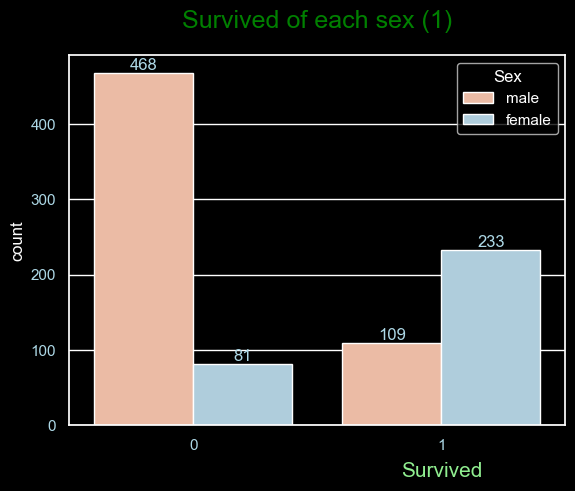

In [ ]:
survived_sex = sns.countplot(x="Survived", data=clean_titanic_data, palette="RdBu", hue= "Sex")

plt.style.use("dark_background")
style="darkgrid"

survived_sex.bar_label(survived_sex.containers[0], color="lightblue")
survived_sex.bar_label(survived_sex.containers[1], color="lightblue")

survived_sex.set_title("Survived of each sex (1)", color = "green", fontsize=18, pad=20)
survived_sex.set_xlabel("Survived", color="lightgreen", fontsize=15)
survived_sex.xaxis.set_label_coords(0.75, -0.1)

plt.gcf().set_facecolor('black')

plt.show()

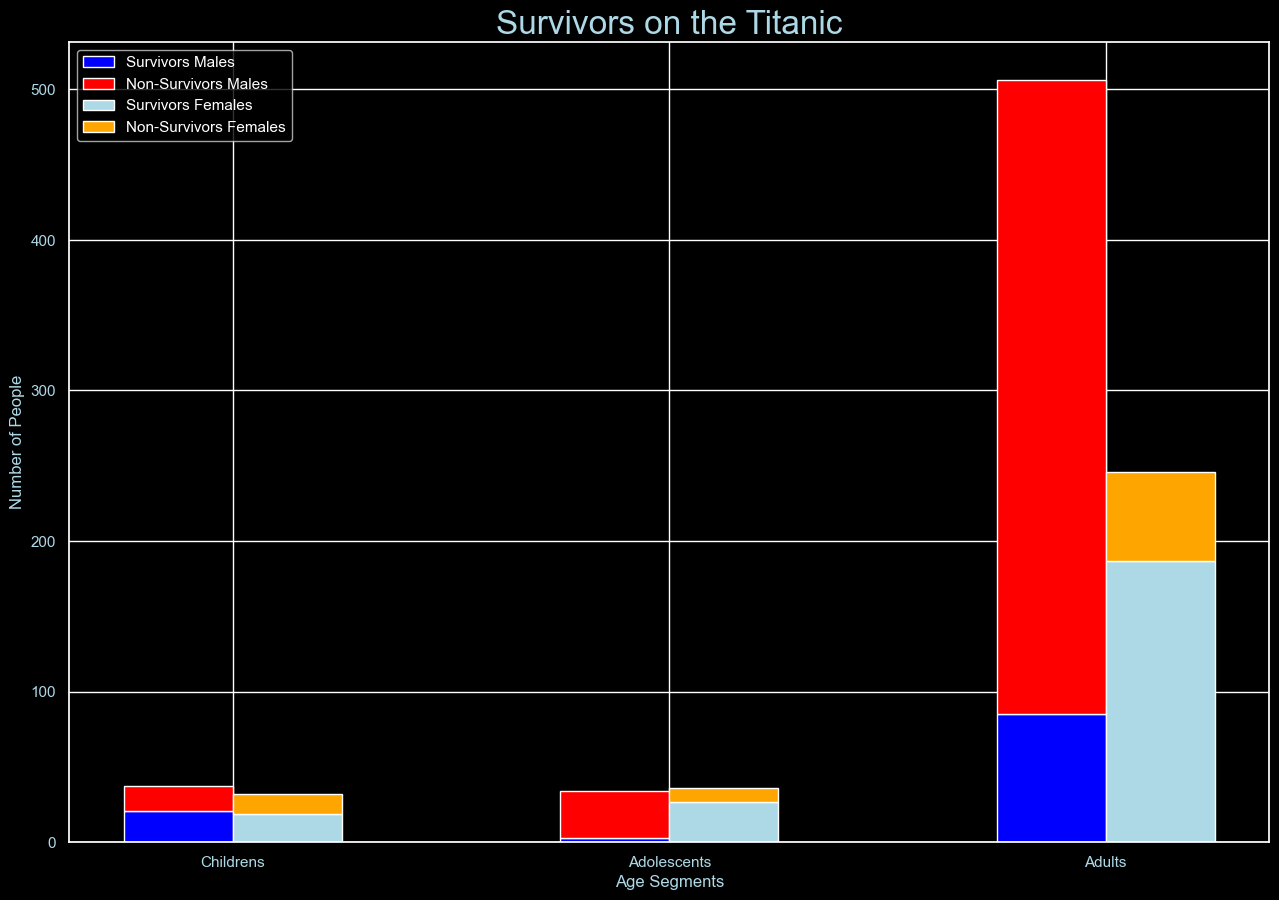

In [ ]:
#Segmentation

age_segments = ['Childrens', 'Adolescents', 'Adults']

childrens = clean_titanic_data[clean_titanic_data['Age'] < 13]
adolescents = clean_titanic_data[(clean_titanic_data['Age'] >= 13) & (clean_titanic_data['Age'] <= 18)]
adults = clean_titanic_data[clean_titanic_data['Age'] > 18]

survivors_M = [childrens[(childrens['Sex'] == 'male') & (childrens['Survived'] == 1)].shape[0],
               adolescents[(adolescents['Sex'] == 'male') & (adolescents['Survived'] == 1)].shape[0],
               adults[(adults['Sex'] == 'male') & (adults['Survived'] == 1)].shape[0]]

survivors_F = [childrens[(childrens['Sex'] == 'female') & (childrens['Survived'] == 1)].shape[0],
               adolescents[(adolescents['Sex'] == 'female') & (adolescents['Survived'] == 1)].shape[0],
               adults[(adults['Sex'] == 'female') & (adults['Survived'] == 1)].shape[0]]

non_survivors_M = [childrens[(childrens['Sex'] == 'male') & (childrens['Survived'] == 0)].shape[0],
                   adolescents[(adolescents['Sex'] == 'male') & (adolescents['Survived'] == 0)].shape[0],
                   adults[(adults['Sex'] == 'male') & (adults['Survived'] == 0)].shape[0]]

non_survivors_F = [childrens[(childrens['Sex'] == 'female') & (childrens['Survived'] == 0)].shape[0],
                   adolescents[(adolescents['Sex'] == 'female') & (adolescents['Survived'] == 0)].shape[0],
                   adults[(adults['Sex'] == 'female') & (adults['Survived'] == 0)].shape[0]]

age_segments = ['Childrens', 'Adolescents', 'Adults']

X = np.arange(3)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])

d1 = ax.bar(X, survivors_M, width=0.25, color='blue')
d2 = ax.bar(X, non_survivors_M, bottom=survivors_M, width=0.25, color='red')
d3 = ax.bar(X + 0.25, survivors_F, width=0.25, color='lightblue')
d4 = ax.bar(X + 0.25, non_survivors_F, bottom=survivors_F, width=0.25, color='orange')

plt.ylabel('Number of People', color='lightblue')
plt.xlabel('Age Segments', color='lightblue')
plt.title('Survivors on the Titanic', color='lightblue', size=24)
plt.xticks(X + 0.125, age_segments, color='lightblue')
plt.yticks(color='lightblue')
plt.legend((d1[0], d2[0], d3[0], d4[0]), ('Survivors Males', 'Non-Survivors Males', 'Survivors Females', 'Non-Survivors Females'))

plt.show()

In [ ]:
count_childrens = len(childrens)
count_adolescents = len(adolescents)
count_adults = len(adults)

total_passengers = count_childrens + count_adolescents + count_adults

percentage_childrens = (count_childrens / total_passengers) * 100
percentage_adolescents = (count_adolescents / total_passengers) * 100
percentage_adults = (count_adults / total_passengers) * 100

print("Number of people in the children segment:", count_childrens)
print("Number of people in the adolescents segment:", count_adolescents)
print("Number of people in the adults segment:", count_adults)

print("Percentage of people in the children segment:", percentage_childrens, "%")
print("Percentage of people in the adolescents segment:", percentage_adolescents, "%")
print("Percentage of people in the adults segment:", percentage_adults, "%")

Number of people in the children segment: 69
Number of people in the adolescents segment: 70
Number of people in the adults segment: 752
Percentage of people in the children segment: 7.744107744107744 %
Percentage of people in the adolescents segment: 7.856341189674524 %
Percentage of people in the adults segment: 84.39955106621774 %


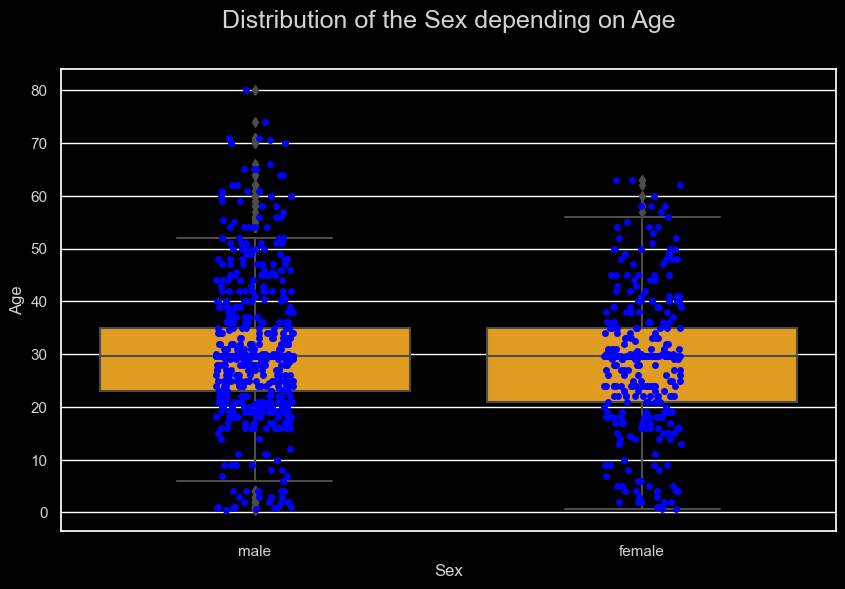

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.facecolor':'black', 'figure.edgecolor':'black'})

plt.figure(figsize=(10, 6))

ax = sns.boxplot(x='Sex', y='Age', data=clean_titanic_data, color='orange').set(title='Distribution of the Sex depending of the Age')
ax = sns.stripplot(x='Sex', y='Age',data=clean_titanic_data, color='blue')



ax.set_ylabel('Age', color="lightgrey")
ax.set_xlabel('Sex', color="lightgrey")
ax.set_title('Distribution of the Sex depending on Age', color='lightgrey', fontsize=18, pad=30)

ax.tick_params(axis='x', colors='lightgrey')  
ax.tick_params(axis='y', colors='lightgrey')

ax.set_facecolor('black')

plt.show()

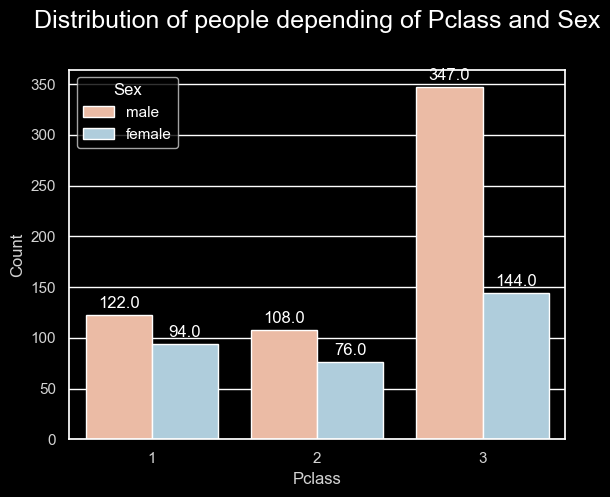

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.set(style="darkgrid")
plt.style.use("dark_background")


fig0 = sns.countplot(x="Pclass", data=clean_titanic_data, palette="RdBu", hue="Sex")


for container in fig0.containers:
    for bar in container:
        height = bar.get_height()
        fig0.annotate(f'{height}', 
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),  
                      textcoords="offset points",
                      ha='center', va='bottom', color='white')

fig0.set_title("Distribution of people depending of Pclass and Sex", fontsize= 18, pad=30)
fig0.set_xlabel("Pclass", color='lightgrey')  
fig0.set_ylabel("Count", color='lightgrey')  
plt.xticks(color='lightgrey')  
plt.yticks(color='lightgrey')

plt.figure(figsize=(10, 6))

plt.show()







In [ ]:
pd.crosstab([clean_titanic_data.Sex,clean_titanic_data.Survived],clean_titanic_data.Pclass,margins=True).style.background_gradient(cmap='crest') 

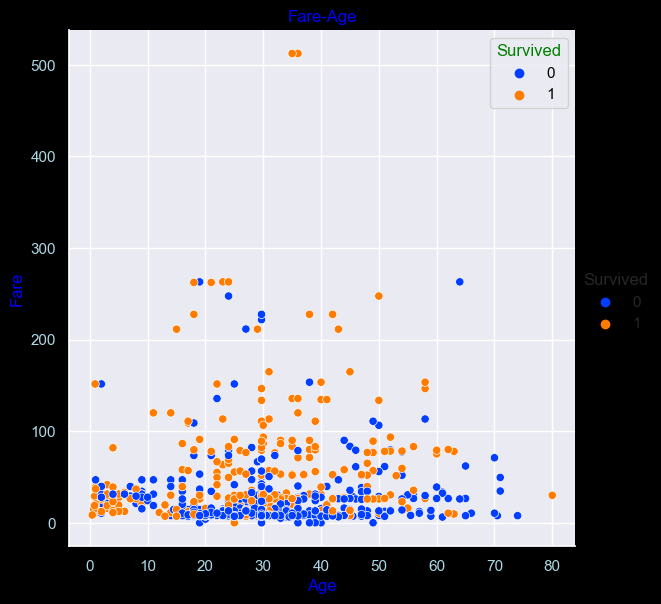

In [ ]:
sns.set_style("darkgrid")
sns.set(rc={'figure.facecolor':'black', 'figure.edgecolor':'blue'})
tab=sns.relplot(data=clean_titanic_data,x="Age", y="Fare", hue="Survived", palette="bright", height=6)
plt.title("Fare-Age", color='blue')

tab.set_titles(color='blue') 
tab.set_xlabels(color='blue')  
tab.set_ylabels(color='blue')

tab.ax.xaxis.label.set_color('blue')  
tab.ax.yaxis.label.set_color('blue')  

sns.set_palette("bright")  
tab.ax.legend() 

# Change color of x-axis and y-axis tick numbers
tab.ax.tick_params(axis='x', colors='lightblue')  
tab.ax.tick_params(axis='y', colors='lightblue')

tab.set(title="Fare-Age",xlabel='Age',ylabel='Fare')



legend = tab.ax.legend()
for text in legend.get_texts():
    text.set_color("black")
legend.set_title("Survived")
legend.get_title().set_color("green")

plt.show()

In [ ]:
fig = px.scatter(clean_titanic_data, x="Age", y="Fare", color="Survived", 
                 title="Fare-Age", labels={"Age": "Age", "Fare": "Fare", "Survived": "Survived"},
                 template="plotly_dark")


fig.update_layout(
    title=dict(
        text="Survived-Fare-Age",
        font=dict(color="lightblue", size= 24),
        x=0.5  
    ),
    xaxis=dict(title=dict(text="Age", font=dict(color="lightblue"))),
    yaxis=dict(title=dict(text="Fare", font=dict(color="lightblue"))),
    
    width=1000,  
    height=600   
)
fig.update_layout(coloraxis_colorbar=dict(
    title_font_color="green"
))

fig.update_xaxes(tickfont_color='blue')
fig.update_yaxes(tickfont_color='blue')

fig.show()

In [ ]:
fig2= px.scatter(clean_titanic_data,x="Age", y="Fare", color="Sex")
fig2.update_layout(
    paper_bgcolor='rgb(0,0,0)',
    plot_bgcolor='rgb(0,0,0)',
    xaxis=dict(title=dict(text="Age", font=dict(color="lightblue"))),  
    yaxis=dict(title=dict(text="Fare", font=dict(color="lightblue"))),  
    legend=dict(title=dict(text="Survived", font=dict(color="green"))),  
    title=dict(text="Scatter Plot of Age vs. Fare", font=dict(color="lightblue", size=24), x=0.5) 
)
fig2.show()

In [ ]:
prob_surv_Embarked = clean_titanic_data.groupby(["Embarked", "Survived"]).size().reset_index(name="counts")
prob_surv_Embarked

prob_surv_Embarked["probability"] = prob_surv_Embarked.apply(lambda row: row.counts / prob_surv_Embarked[prob_surv_Embarked.Embarked == row.Embarked]["counts"].sum()*100, axis=1).round(2)
prob_surv_Embarked["probability"]

prob_surv_Embarked2 = px.bar(
    prob_surv_Embarked,
    x="Embarked",
    y="probability",
    color="Survived",
    labels={"Embarked": "Embarked", "probability": "Probability of Survived"},
    text_auto=True,
    title="Probability of Survived depending on the embarked",
    template="plotly_dark",  #
)


prob_surv_Embarked2.update_layout(
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    font=dict(color="white"),
    xaxis=dict(title=dict(font=dict(color="white"))),
    yaxis=dict(title=dict(font=dict(color="white"))),
    legend=dict(title=dict(font=dict(color="green"))),
    title=dict(
        text="Probability of Survived depending on the embarked",
        font=dict(color="lightblue", size=24),  
        x=0.5,  
    ),
)

prob_surv_Embarked2.show()

C: Cherbourg (France),
Q: Queenstown (currently is Cobh, Ireland),
S: Southampton (United Kingdom)

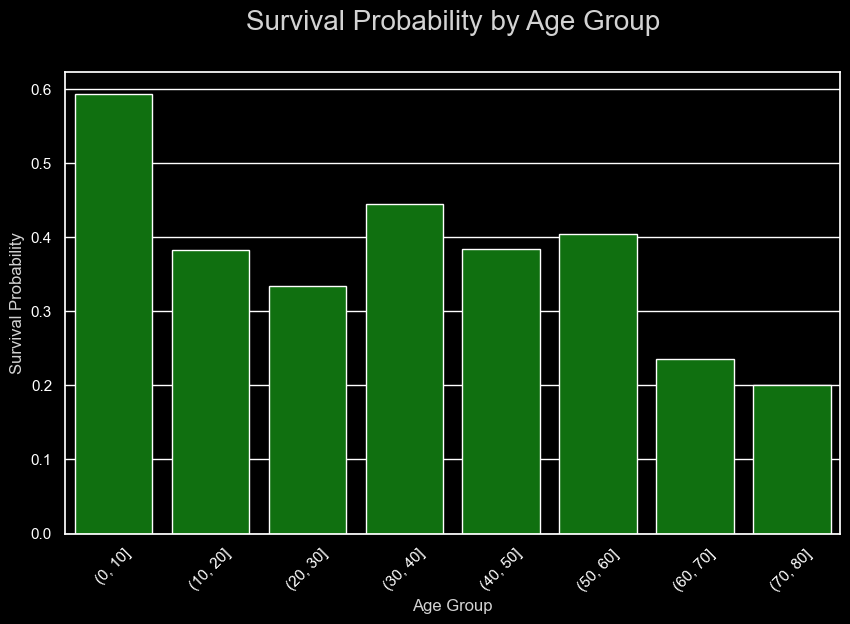

In [ ]:
sns.set(style="darkgrid")
plt.style.use("dark_background")


age_bins = pd.cut(clean_titanic_data['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
age_survival_probs = clean_titanic_data.groupby(age_bins)['Survived'].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=age_survival_probs.index, y=age_survival_probs.values, color='green')


plt.xlabel('Age Group', color ="lightgrey")
plt.ylabel('Survival Probability', color ="lightgrey")
plt.title('Survival Probability by Age Group', color ="lightgrey", fontsize="20", pad=30)
plt.xticks(rotation=45)  

plt.show()

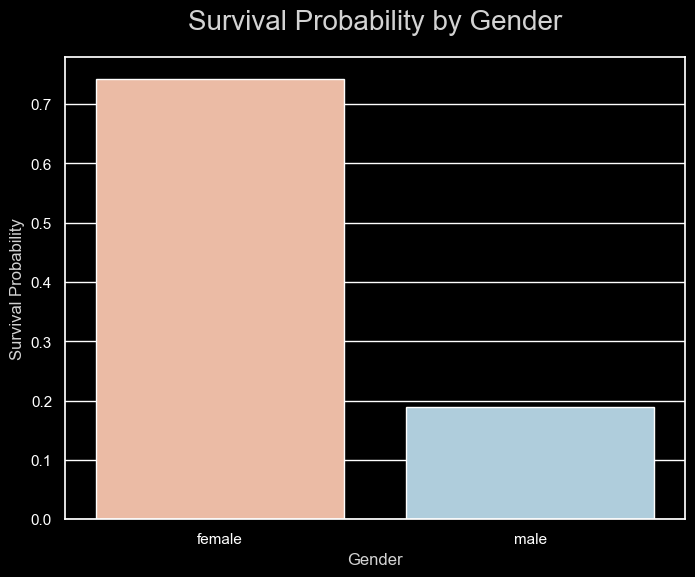

In [ ]:
sns.set(style="darkgrid")
plt.style.use("dark_background")


survival_prob_gender = clean_titanic_data.groupby('Sex')['Survived'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_prob_gender.index, y=survival_prob_gender.values, palette="RdBu")

# Configurar etiquetas y título
plt.xlabel('Gender', color = "lightgrey")
plt.ylabel('Survival Probability', color = "lightgrey")
plt.title('Survival Probability by Gender', color = "lightgrey", fontsize=20, pad=20)

# Mostrar el gráfico
plt.show()

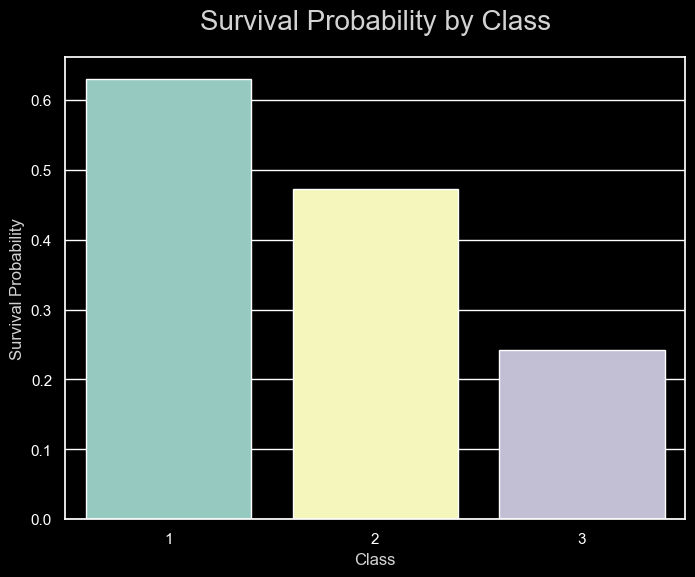

In [ ]:
sns.set(style="darkgrid")
plt.style.use("dark_background")


survival_prob_class = clean_titanic_data.groupby('Pclass')['Survived'].mean()


plt.figure(figsize=(8, 6))
sns.barplot(x=survival_prob_class.index, y=survival_prob_class.values)
palette = sns.color_palette("deep")
inverted_palette = list(reversed(palette))


plt.xlabel('Class', color = "lightgrey")
plt.ylabel('Survival Probability', color = "lightgrey")
plt.title('Survival Probability by Class', color = "lightgrey", fontsize=20, pad=20)


plt.show()

In [ ]:
graph_3variables= px.scatter(clean_titanic_data,x="Age", y="Pclass", color="Survived")
graph_3variables.update_layout(
    paper_bgcolor='rgb(0,0,0)',
    plot_bgcolor='rgb(0,0,0)',
    xaxis=dict(title=dict(text="Age", font=dict(color="lightblue"))),  
    yaxis=dict(title=dict(text="Pclass", font=dict(color="lightblue"))),  
    legend=dict(title=dict(text="Survived", font=dict(color="green"))),
    title=dict(text="Scatter Plot of Age vs. Pclass", font=dict(color="lightblue", size=24), x=0.5),  
)
graph_3variables.show()

## <span style="color:lightblue"> 5. Models </span> 

Machine Learning: Supervised and unsupervised ML models (KNNs, Decision Trees, Random forests, Support vector machines, Gradient boosted trees, XGBoost, LightGBM, K-Means Clustering and more).

Deep Learning: neural network architectures with PyTorch. 



### <span style="color:lightblue"> 5.1 Libraries </span> 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

### <span style="color:lightblue"> 5.2 Survived Prediction </span> 
Tree Decision Classifier

#### <span style="color:lightblue"> 5.2.1 Preprocessing </span> 

In [ ]:
clean_titanic_data.dtypes

Unnamed: 0      int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age           float64
SibSp           int64
Parch           int64
Ticket         object
Fare          float64
Cabin          object
Embarked       object
dtype: object

In [ ]:
clean_titanic_data.drop("Name", axis=1, inplace=True)



In [ ]:
clean_titanic_data.drop("Ticket", axis=1, inplace=True)

clean_titanic_data.drop("Cabin", axis=1, inplace=True)

clean_titanic_data.drop("Embarked", axis=1, inplace=True)

In [ ]:
label_encoder = LabelEncoder()
clean_titanic_data['Sex_encoded'] = label_encoder.fit_transform(clean_titanic_data['Sex'])

print(clean_titanic_data[['Sex', 'Sex_encoded']].head())

      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [ ]:
clean_titanic_data.drop("Sex", axis=1, inplace=True)

#### <span style="color:lightblue"> 5.2.2 Modeling </span> 

In [ ]:
x= clean_titanic_data.drop("Survived", axis=1)
y=clean_titanic_data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #divided the data in train data and test data

model1_survived_prediction = DecisionTreeClassifier(random_state=42)  #created and train the model
model1_survived_prediction.fit(x_train, y_train)

predictions = model1_survived_prediction.predict(x_test) #make predictions in the test dataset

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.7374301675977654


A prediction model with an accuracy of 0.7374 means that the model has correctly predicted approximately 73.74% of the instances in the test dataset. In other words, out of all the samples in the test set, 73.74% of them were classified correctly by the model.

In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6956521739130435
Recall: 0.6486486486486487
F1-Score: 0.6713286713286714


Precision: The precision value is 0.6957. This means that out of all instances that the model classified as positive, approximately 69.57% actually belong to the positive class. In other words, when the model predicts that a passenger survived, it is correct around 69.57% of the time.

Recall: The recall value is 0.6487. This indicates that the model has correctly identified approximately 64.87% of all instances that truly belong to the positive class. In other words, out of all passengers who actually survived, the model correctly identified them in 64.87% of cases.

F1-Score: The F1-Score value is 0.6713. The F1-Score is a metric that combines both precision and recall into a single measure. In this case, the F1-Score value suggests a good balance between precision and recall in the model. An F1-Score of 1 would be perfect, and an F1-Score of 0 would be the worst scenario.

These results indicate that the model has moderate performance in terms of precision, recall, and F1-Score.

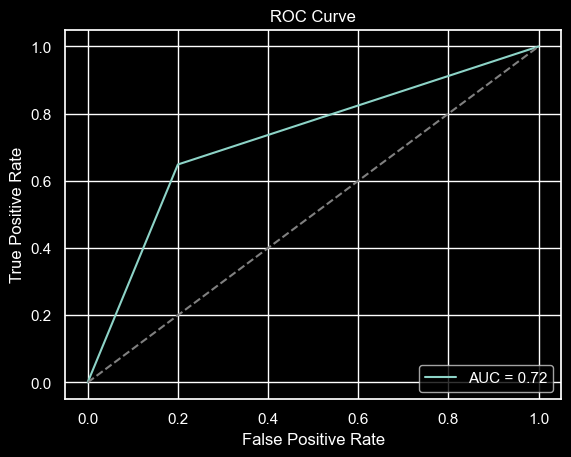

In [ ]:
probs = model1_survived_prediction.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Continuing to adjust and improve a machine learning model involves taking a series of steps and techniques to achieve a more accurate and generalized performance.

### <span style="color:lightblue"> 5.3 XGBoost </span> 

## <span style="color:lightblue"> 6. Conclusions </span> 

Based on the analysis of the Titanic dataset, we can observe that the vast majority of non-survivors (61.6%) were adult males from the second and third class. To explain this, I had to refer to other data sources such as the Titanic's cabin distribution map (National Museums Liverpool), where we can see that passengers of the second and third class were located in less favorable areas, as could be assumed as a hypothesis.